# Filter Method With SMOTE-ENN

## Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split , GridSearchCV , KFold
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, make_scorer, confusion_matrix, log_loss
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

## Import Data

In [2]:
# Import  the SPSS data file
df=pd.read_spss("E:\Data Analysis\BDHS_2017-2018.sav")
# Displaying the first 5 rows of the DataFrame
df.head()

,V013,V024,V025,V106,V701,V130,V151,V201,V123,V124,...,V190,V190A,V113,V116,V161,V213,V404,V743A,V312,BMI2
0,15-19,Rajshahi,Rural,Secondary,No education,Islam,Male,No child,No,No,...,Poorest,Poorest,Improved,Improved,Solid fuel,No or unsure,No,Respondent and husband/partner,Modern methods,Underweight/Normal
1,45-49,Rangpur,Urban,Primary,No education,Islam,Male,More than two child,No,No,...,Poorest,Poorest,Improved,Improved,Solid fuel,No or unsure,No,Respondent and husband/partner,Traditional methods,Underweight/Normal
2,15-19,Khulna,Rural,Secondary,Primary,Islam,Male,One child,No,No,...,Poorer,Poorer,Improved,Improved,Solid fuel,No or unsure,Yes,Respondent and husband/partner,Modern methods,Underweight/Normal
3,40-44,Barisal,Urban,Primary,Primary,Islam,Male,More than two child,No,No,...,Poorest,Poorest,Improved,Improved,Solid fuel,No or unsure,No,Respondent and husband/partner,Not using,Underweight/Normal
4,25-29,Barisal,Rural,Secondary,Higher,Islam,Male,One child,No,No,...,Richer,Richest,Improved,Improved,Solid fuel,Yes,No,Respondent and husband/partner,Not using,Underweight/Normal


## Get some Basic Information

In [3]:
# Displaying a summary of the DataFrame, including the number of non-null entries and data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16303 entries, 0 to 16302
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   V013    16303 non-null  category
 1   V024    16303 non-null  category
 2   V025    16303 non-null  category
 3   V106    16303 non-null  category
 4   V701    16303 non-null  category
 5   V130    16303 non-null  category
 6   V151    16303 non-null  category
 7   V201    16303 non-null  category
 8   V123    16303 non-null  category
 9   V124    16303 non-null  category
 10  V125    16303 non-null  category
 11  V119    16303 non-null  category
 12  V122    16303 non-null  category
 13  V121    16303 non-null  category
 14  V159    16303 non-null  category
 15  V716    16303 non-null  category
 16  V704    16303 non-null  category
 17  V190    16303 non-null  category
 18  V190A   16303 non-null  category
 19  V113    16303 non-null  category
 20  V116    16303 non-null  category
 21  V161    1630

In [4]:
# Checking missing values
df.isnull().sum().sum()

0

In [5]:
# Checking the dimensions of the DataFrame
df.shape

(16303, 27)

In [6]:
# Displaying the column labels (names) of the DataFrame
df.columns

Index(['V013', 'V024', 'V025', 'V106', 'V701', 'V130', 'V151', 'V201', 'V123',
       'V124', 'V125', 'V119', 'V122', 'V121', 'V159', 'V716', 'V704', 'V190',
       'V190A', 'V113', 'V116', 'V161', 'V213', 'V404', 'V743A', 'V312',
       'BMI2'],
      dtype='object')

In [7]:
# Counting the frequency of each unique value in the 'BMI2' column
df.BMI2.value_counts()

BMI2
Underweight/Normal    10951
Overweight/Obese       5352
Name: count, dtype: int64

## Feature Transformation

In [8]:
# Transform the selected features
V013 = {'15-19': 1, '20-24': 2,'25-29':3,'30-34':4,'35-39':5,'40-44':6,'45-49':7}
df['V013'] = df['V013'].map(V013)
V024 = {'Barisal': 1, 'Chittagong': 2,'Dhaka':3,'Khulna':4,'Mymensingh':5,'Rajshahi':6,'Rangpur':7,'Sylhet':8}
df['V024'] = df['V024'].map(V024)
V025 = {'Urban': 1, 'Rural': 2}
df['V025'] = df['V025'].map(V025)
V106 = {'No education': 0, 'Primary': 1,'Secondary':2,'Higher':3}
df['V106'] = df['V106'].map(V106)
V701= {'No education': 0, 'Primary': 1,'Secondary':2,'Higher':3,"Don't know":4}
df['V701'] = df['V701'].map(V701)
V130 = {'Islam': 0, 'Hinduism': 1,'Buddhism':2,'Christianity':3}
df['V130'] = df['V130'].map(V130)
V151= {'Male': 1, 'Female': 2}
df['V151'] = df['V151'].map(V151)
V201= {'No child': 0, 'One child': 1,'Two child':2,'More than two child':3}
df['V201'] = df['V201'].map(V201)
V123= {'No': 0, 'Yes': 1}
df['V123'] = df['V123'].map(V123)
V124= {'No': 0, 'Yes': 1}
df['V124'] = df['V124'].map(V124)
V125= {'No': 0, 'Yes': 1}
df['V125'] = df['V125'].map(V125)
V119= {'No': 0, 'Yes': 1}
df['V119'] = df['V119'].map(V119)
V122= {'No': 0, 'Yes': 1}
df['V122'] = df['V122'].map(V122)
V121= {'No': 0, 'Yes': 1}
df['V121'] = df['V121'].map(V121)
V159= {'Not at all': 0, 'Less than once a week': 1,'At least once a week':2,'Almost every day':3}
df['V159'] = df['V159'].map(V159)
V716= {'Unemployed': 0, 'Agriculture': 1,'Business':2,'Labor/ Service':3,'Job':4}
df['V716'] = df['V716'].map(V716)
V704= {'Unemployed': 0, 'Agriculture': 1,'Business':2,'Labor/ Service':3,'Job':4}
df['V704'] = df['V704'].map(V704)
V190= {'Poorest': 1, 'Poorer': 2,'Middle':3,'Richer':4,'Richest':5}
df['V190'] = df['V190'].map(V190)
V190A= {'Poorest': 1, 'Poorer': 2,'Middle':3,'Richer':4,'Richest':5}
df['V190A'] = df['V190A'].map(V190A)
V113= {'Improved': 1, 'Unimproved': 2}
df['V113'] = df['V113'].map(V113)
V116= {'Improved': 1, 'Unimproved': 2}
df['V116'] = df['V116'].map(V116)
V161= {'Solid fuel': 0, 'Clean fuel': 1}
df['V161'] = df['V161'].map(V161)
V213= {'No or unsure': 0, 'Yes': 1}
df['V213'] = df['V213'].map(V213)
V404= {'No': 0, 'Yes': 1}
df['V404'] = df['V404'].map(V404)
V743A= {'Respondent alone': 1, 'Respondent and husband/partner': 2, "Respondent and other's person": 3}
df['V743A'] = df['V743A'].map(V743A)
V312= {'Not using': 0, 'Modern methods': 1,'Traditional methods':2}
df['V312'] = df['V312'].map(V312)
BMI2= {'Underweight/Normal': 0, 'Overweight/Obese': 1}
df['BMI2'] = df['BMI2'].map(BMI2)

In [9]:
# Displaying the first 5 rows of the DataFrame after transformation
df.head()

,V013,V024,V025,V106,V701,V130,V151,V201,V123,V124,...,V190,V190A,V113,V116,V161,V213,V404,V743A,V312,BMI2
0,1,6,2,2,0,0,1,0,0,0,...,1,1,1,1,0,0,0,2,1,0
1,7,7,1,1,0,0,1,3,0,0,...,1,1,1,1,0,0,0,2,2,0
2,1,4,2,2,1,0,1,1,0,0,...,2,2,1,1,0,0,1,2,1,0
3,6,1,1,1,1,0,1,3,0,0,...,1,1,1,1,0,0,0,2,0,0
4,3,1,2,2,3,0,1,1,0,0,...,4,5,1,1,0,1,0,2,0,0


In [10]:
# Checking missing values after transformation
df.isnull().sum().sum()

0

## Define Explanatory and Outcome Variable

In [11]:
# Drop the Outcome variable from the DataFrame in order to create explanatory variavle
x=df.drop(["BMI2"],axis=1)
y=df["BMI2"]

In [12]:
# Checking the dimensions of the explanatory and outcome variable
x.shape, y.shape

((16303, 26), (16303,))

## Explanatory Data Analysis (EDA)

### BMI2 Graph

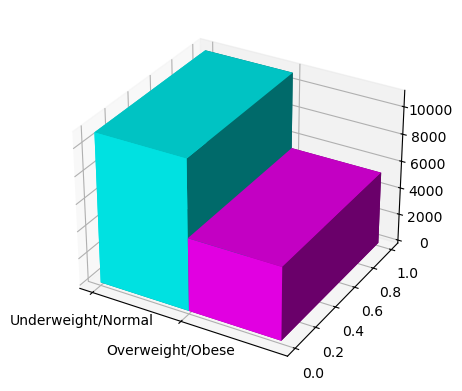

In [13]:
# Calculate the counts for each category in y
counts = np.bincount(y)

# Set up the figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the X, Y, and Z coordinates for the bars
X = np.arange(len(counts))  # [0, 1] for two categories
Y = np.zeros_like(X)  # Y values are all zeros, used just for plotting
Z = np.zeros_like(X)  # Z values are the base of the bars, all zeros

# Define the width, depth, and height of the bars
dx = np.ones_like(X)
dy = np.ones_like(Y)
dz = counts

# Create the bars
ax.bar3d(X, Y, Z, dx, dy, dz, color=['cyan', 'magenta'], zsort='average')

# Set labels and title
ax.set_xticks(X)
ax.set_xticklabels(BMI2)
# Set labels and title with Times New Roman font style
font = {'fontname': 'Times New Roman'}
# Show the plot
plt.show()

### Correlation

In [14]:
# Calculating and displaying the correlation matrix, showing the correlation coefficients between the features of the DataFrame
corr=df.corr()
corr

,V013,V024,V025,V106,V701,V130,V151,V201,V123,V124,...,V190,V190A,V113,V116,V161,V213,V404,V743A,V312,BMI2
V013,1.000000,0.012270,0.000005,-0.372709,-0.180281,0.041279,-0.016666,0.628503,0.057086,-0.008857,...,0.033628,0.050007,-0.005947,-0.015388,-0.014718,-0.205750,-0.376753,-0.153510,0.075661,0.164128
V024,0.012270,1.000000,0.072954,-0.084455,-0.084267,0.055474,-0.079159,0.015849,0.147911,0.066598,...,-0.101378,-0.075478,0.003749,0.037304,-0.104859,0.007359,0.027689,0.038750,0.021058,-0.088859
V025,0.000005,0.072954,1.000000,-0.150652,-0.178218,0.002744,0.042323,0.085681,0.112747,-0.055957,...,-0.426624,0.031221,0.063251,0.135389,-0.488728,0.001918,0.027265,0.028443,-0.051644,-0.159486
V106,-0.372709,-0.084455,-0.150652,1.000000,0.624033,0.037122,0.034919,-0.406391,0.043280,0.225866,...,0.405645,0.391025,-0.019958,-0.241745,0.229329,0.084036,0.134791,0.046227,-0.023164,0.114590
V701,-0.180281,-0.084267,-0.178218,0.624033,1.000000,0.057236,0.045746,-0.290724,0.041009,0.256817,...,0.472606,0.455129,-0.019901,-0.281662,0.272436,0.034932,0.057019,0.035624,-0.022194,0.160627
V130,0.041279,0.055474,0.002744,0.037122,0.057236,1.000000,-0.053993,-0.042693,0.024064,0.009224,...,-0.018309,-0.012792,0.022688,-0.001122,-0.003387,-0.014777,-0.014139,0.026270,0.047909,-0.001419
V151,-0.016666,-0.079159,0.042323,0.034919,0.045746,-0.053993,1.000000,0.004826,-0.091827,-0.066338,...,0.048400,0.068024,-0.001981,-0.018295,-0.003931,-0.013122,-0.008311,-0.177119,-0.206784,0.017575
V201,0.628503,0.015849,0.085681,-0.406391,-0.290724,-0.042693,0.004826,1.000000,0.021947,-0.083450,...,-0.147240,-0.113775,0.005818,0.090481,-0.106746,-0.227950,-0.044287,-0.135992,0.201682,0.063840
V123,0.057086,0.147911,0.112747,0.043280,0.041009,0.024064,-0.091827,0.021947,1.000000,0.068383,...,0.017298,0.078099,-0.011324,-0.050438,-0.151448,-0.014816,-0.047293,0.044226,0.041050,0.000699
V124,-0.008857,0.066598,-0.055957,0.225866,0.256817,0.009224,-0.066338,-0.083450,0.068383,1.000000,...,0.303283,0.307286,-0.014719,-0.149957,0.093582,0.015073,-0.002484,0.037984,0.016878,0.115980


In [15]:
#correlation heatmap
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,V013,V024,V025,V106,V701,V130,V151,V201,V123,V124,V125,V119,V122,V121,V159,V716,V704,V190,V190A,V113,V116,V161,V213,V404,V743A,V312,BMI2
V013,1.00,0.01,0.00,-0.37,-0.18,0.04,-0.02,0.63,0.06,-0.01,0.01,0.02,0.03,0.02,-0.04,0.07,-0.21,0.03,0.05,-0.01,-0.02,-0.01,-0.21,-0.38,-0.15,0.08,0.16
V024,0.01,1.00,0.07,-0.08,-0.08,0.06,-0.08,0.02,0.15,0.07,0.00,0.01,-0.11,-0.04,-0.04,0.02,-0.09,-0.10,-0.08,0.00,0.04,-0.10,0.01,0.03,0.04,0.02,-0.09
V025,0.00,0.07,1.00,-0.15,-0.18,0.00,0.04,0.09,0.11,-0.06,-0.07,-0.22,-0.28,-0.30,-0.28,-0.08,-0.23,-0.43,0.03,0.06,0.14,-0.49,0.00,0.03,0.03,-0.05,-0.16
V106,-0.37,-0.08,-0.15,1.00,0.62,0.04,0.03,-0.41,0.04,0.23,0.07,0.18,0.36,0.26,0.27,-0.01,0.26,0.41,0.39,-0.02,-0.24,0.23,0.08,0.13,0.05,-0.02,0.11
V701,-0.18,-0.08,-0.18,0.62,1.00,0.06,0.05,-0.29,0.04,0.26,0.07,0.19,0.41,0.29,0.26,-0.04,0.28,0.47,0.46,-0.02,-0.28,0.27,0.03,0.06,0.04,-0.02,0.16
V130,0.04,0.06,0.00,0.04,0.06,1.00,-0.05,-0.04,0.02,0.01,-0.01,-0.07,-0.06,0.03,0.04,0.05,-0.01,-0.02,-0.01,0.02,-0.00,-0.00,-0.01,-0.01,0.03,0.05,-0.00
V151,-0.02,-0.08,0.04,0.03,0.05,-0.05,1.00,0.00,-0.09,-0.07,-0.01,0.02,0.07,0.01,0.01,-0.04,0.17,0.05,0.07,-0.00,-0.02,-0.00,-0.01,-0.01,-0.18,-0.21,0.02
V201,0.63,0.02,0.09,-0.41,-0.29,-0.04,0.00,1.00,0.02,-0.08,-0.01,-0.06,-0.10,-0.10,-0.14,0.02,-0.20,-0.15,-0.11,0.01,0.09,-0.11,-0.23,-0.04,-0.14,0.20,0.06
V123,0.06,0.15,0.11,0.04,0.04,0.02,-0.09,0.02,1.00,0.07,-0.02,0.03,-0.02,0.04,0.03,0.02,-0.09,0.02,0.08,-0.01,-0.05,-0.15,-0.01,-0.05,0.04,0.04,0.00
V124,-0.01,0.07,-0.06,0.23,0.26,0.01,-0.07,-0.08,0.07,1.00,0.11,0.09,0.27,0.20,0.15,-0.02,0.07,0.30,0.31,-0.01,-0.15,0.09,0.02,-0.00,0.04,0.02,0.12


## Feature Selection: Filter Method (Chi-square)

In [16]:
# Calculating the Chi-square scores and p-values for each feature
chi2_score= chi2(x, y)
chi2_score

(array([3.64230846e+02, 1.44887655e+02, 5.60356773e+01, 1.19088677e+02,
        3.06459280e+02, 3.46799539e-02, 4.54975634e-01, 3.09842279e+01,
        5.52905151e-03, 1.97857287e+02, 3.96325375e+01, 5.49903434e+01,
        7.21063984e+02, 3.57693266e+02, 3.88077976e+02, 2.22947772e+00,
        4.28741357e+01, 8.37394362e+02, 6.22624381e+02, 5.89714186e-01,
        5.79877460e+01, 5.25091946e+02, 3.84785129e+00, 2.74026518e+02,
        2.25472098e+00, 2.61759563e+00]),
 array([3.37554719e-081, 2.27259691e-033, 7.11677764e-014, 1.00150685e-027,
        1.28991398e-068, 8.52267892e-001, 4.99981527e-001, 2.60133772e-008,
        9.40725852e-001, 6.12960153e-045, 3.06533390e-010, 1.21123463e-013,
        7.85775142e-159, 8.95103209e-080, 2.16923608e-086, 1.35399609e-001,
        5.83773872e-011, 4.00020851e-184, 2.00893462e-137, 4.42529663e-001,
        2.63755687e-014, 3.30165694e-116, 4.98097635e-002, 1.50442608e-061,
        1.33207464e-001, 1.05684469e-001]))

In [17]:
# Displaying the p-values in ascending order (smallest p-values first)
p_values = pd.Series(chi2_score[1])
p_values.index = x.columns
p_values.sort_values(ascending = True, inplace = True)
p_values

V190     4.000209e-184
V122     7.857751e-159
V190A    2.008935e-137
V161     3.301657e-116
V159      2.169236e-86
V013      3.375547e-81
V121      8.951032e-80
V701      1.289914e-68
V404      1.504426e-61
V124      6.129602e-45
V024      2.272597e-33
V106      1.001507e-27
V116      2.637557e-14
V025      7.116778e-14
V119      1.211235e-13
V704      5.837739e-11
V125      3.065334e-10
V201      2.601338e-08
V213      4.980976e-02
V312      1.056845e-01
V743A     1.332075e-01
V716      1.353996e-01
V113      4.425297e-01
V151      4.999815e-01
V130      8.522679e-01
V123      9.407259e-01
dtype: float64

<Axes: >

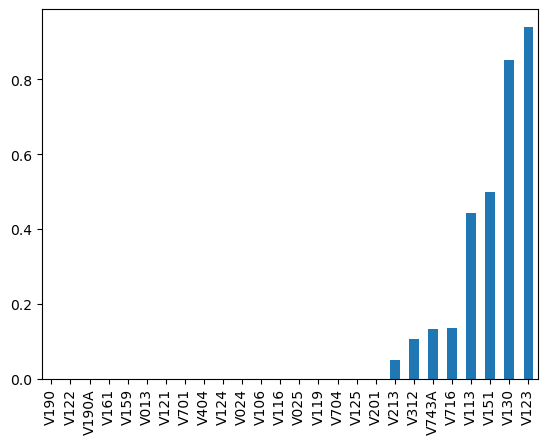

In [18]:
# Constructing a bar plot of the sorted p-values.
p_values.sort_values(ascending=True).plot.bar()

In [19]:
# Selecting the features with p-values,consider as 5% level of significance
chi2_selected_features = p_values[p_values < 0.05].index
chi2_selected_features

Index(['V190', 'V122', 'V190A', 'V161', 'V159', 'V013', 'V121', 'V701', 'V404',
       'V124', 'V024', 'V106', 'V116', 'V025', 'V119', 'V704', 'V125', 'V201',
       'V213'],
      dtype='object')

In [20]:
# Creating a new DataFrame containing only the selected features
x_selected=df[chi2_selected_features]
# Checking the dimensions of the selected DataFrame
x_selected.shape

(16303, 19)

## Dataset Balancing (SMOTE-ENN)

In [21]:
# Applying SMOTE-ENN to handle class imbalance to the selected features
smote_enn = SMOTEENN(sampling_strategy="auto", random_state=42)
x_resampled, y_resampled = smote_enn.fit_resample(x_selected, y)
# Checking the dimensions of the explanatory and outcome variable after resampling
x_resampled.shape , y_resampled.shape

((9216, 19), (9216,))

In [22]:
# Counting the frequency of each unique value in the 'BMI2' column after resampling
y_resampled.value_counts()

BMI2
1    5754
0    3462
Name: count, dtype: int64

## Train-Test Spliting

In [23]:
# Spliting the data set into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, random_state=42, stratify=y_resampled, test_size=.2)

In [24]:
# Checking the dimensions of the training and testing subsets
x_train.shape, x_test.shape

((7372, 19), (1844, 19))

In [25]:
# Checking the dimensions of the training and testing subsets
y_train.shape, y_test.shape

((7372,), (1844,))

In [26]:
x_train.head()

,V190,V122,V190A,V161,V159,V013,V121,V701,V404,V124,V024,V106,V116,V025,V119,V704,V125,V201,V213
2881,2,0,3,0,2,2,1,1,1,0,4,2,2,2,1,3,0,2,0
6826,5,1,4,1,0,6,0,3,0,0,5,3,1,1,1,4,0,2,0
7740,5,1,4,1,2,7,1,3,0,0,3,2,1,1,1,4,0,2,0
2015,1,0,1,0,0,5,0,0,1,0,7,1,2,2,0,1,0,1,0
4034,4,0,4,0,2,7,1,1,0,1,6,0,1,2,1,3,0,2,0


In [27]:
y_train.head()

2881    0
6826    1
7740    1
2015    0
4034    1
Name: BMI2, dtype: category
Categories (2, int64): [1, 0]

## (Default) Classification Algorithm in Machine Learning

### 1. Support Vector Machine (SVM)

In [28]:
# Initialize the SVM model
model_svm=SVC()
model_svm.fit(x_train, y_train) 
y_pred = model_svm.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       693
           1       0.88      0.91      0.90      1151

    accuracy                           0.87      1844
   macro avg       0.87      0.86      0.86      1844
weighted avg       0.87      0.87      0.87      1844



In [29]:
# Printing the default parameters
print(model_svm.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


<Axes: >

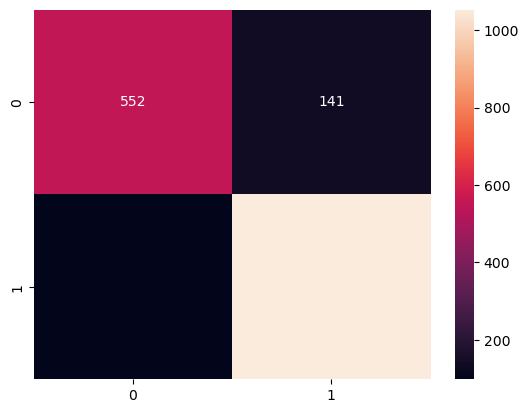

In [30]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [31]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [32]:
# Printing the performance evaluation
accuracy_svm= accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)
kappa_svm = cohen_kappa_score(y_test, y_pred)
specificity_svm = specificity_score(y_test, y_pred)
log_loss_svm = log_loss(y_test, y_pred)
roc_auc_score_svm = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("Kappa:",kappa_svm)
print("Specificity:", specificity_svm)
print("AUC:", roc_auc_score_svm)
print("Log Loss:", log_loss_svm) 

Accuracy: 0.8703904555314533
Precision: 0.8819095477386935
Recall: 0.9148566463944396
F1 Score: 0.8980810234541577
Kappa: 0.7202854546100768
Specificity: 0.7965367965367965
AUC: 0.8556967214656181
Log Loss: 4.671601496745661


### 2. Logistic Regression (LR)

In [33]:
# Initialize the SVM model
model_lr=LogisticRegression()
model_lr.fit(x_train, y_train) 
y_pred = model_lr.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       693
           1       0.85      0.90      0.87      1151

    accuracy                           0.84      1844
   macro avg       0.83      0.82      0.82      1844
weighted avg       0.84      0.84      0.84      1844



In [34]:
# Printing the default parameters
print(model_lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


<Axes: >

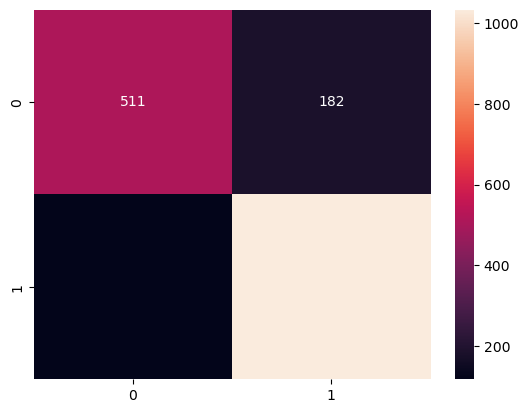

In [35]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [36]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [37]:
# Printing the performance evaluation
accuracy_lr= accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)
kappa_lr = cohen_kappa_score(y_test, y_pred)
specificity_lr = specificity_score(y_test, y_pred)
log_loss_lr = log_loss(y_test, y_pred)
roc_auc_score_lr = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("Kappa:", kappa_lr)
print("Specificity:", specificity_lr)
print("AUC:", roc_auc_score_lr)
print("Log Loss:", log_loss_lr) 

Accuracy: 0.8378524945770065
Precision: 0.850328947368421
Recall: 0.8983492615117289
F1 Score: 0.8736797634136038
Kappa: 0.6478119674279919
Specificity: 0.7373737373737373
AUC: 0.817861499442733
Log Loss: 5.844388483376371


### 3. Random Forest (RF)

In [38]:
# Initialize the SVM model
model_rf=RandomForestClassifier()
model_rf.fit(x_train, y_train) 
y_pred = model_rf.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       693
           1       0.93      0.96      0.94      1151

    accuracy                           0.93      1844
   macro avg       0.93      0.92      0.92      1844
weighted avg       0.93      0.93      0.93      1844



In [39]:
# Printing the default parameters
print(model_rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


<Axes: >

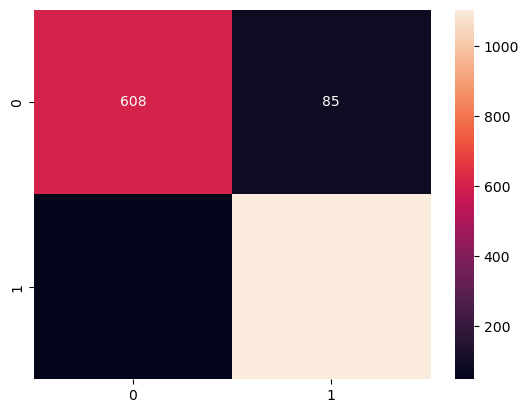

In [40]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [41]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [42]:
# Printing the performance evaluation
accuracy_rf= accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
kappa_rf = cohen_kappa_score(y_test, y_pred)
specificity_rf = specificity_score(y_test, y_pred)
log_loss_rf = log_loss(y_test, y_pred)
roc_auc_score_rf = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Kappa:", kappa_rf)
print("Specificity:", specificity_rf)
print("AUC:", roc_auc_score_rf)
print("Log Loss:", log_loss_rf) 

Accuracy: 0.928416485900217
Precision: 0.928511354079058
Recall: 0.9591659426585578
F1 Score: 0.9435897435897436
Kappa: 0.845737513958585
Specificity: 0.8773448773448773
AUC: 0.9182554100017176
Log Loss: 2.5801313705875617


### 4. K-Nearest Neighbor (KNN)

In [43]:
# Initialize the KNN model
model_knn=KNeighborsClassifier()
model_knn.fit(x_train, y_train) 
y_pred = model_knn.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       693
           1       0.91      0.97      0.93      1151

    accuracy                           0.92      1844
   macro avg       0.92      0.90      0.91      1844
weighted avg       0.92      0.92      0.91      1844



In [44]:
# Printing the default parameters
print(model_knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


<Axes: >

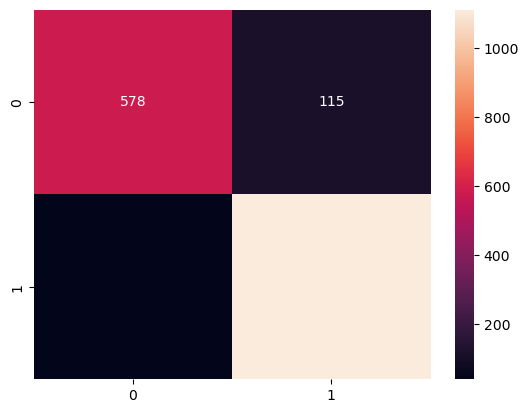

In [45]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [46]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [47]:
# Printing the performance evaluation
accuracy_knn= accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
kappa_knn = cohen_kappa_score(y_test, y_pred)
specificity_knn = specificity_score(y_test, y_pred)
log_loss_knn = log_loss(y_test, y_pred)
roc_auc_score_knn = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("Kappa:", kappa_knn)
print("Specificity:", specificity_knn)
print("AUC:", roc_auc_score_knn)
print("Log Loss:", log_loss_knn) 

Accuracy: 0.915943600867679
Precision: 0.9061990212071778
Recall: 0.9652476107732406
F1 Score: 0.9347917543121582
Kappa: 0.8168919161323719
Specificity: 0.834054834054834
AUC: 0.8996512224140373
Log Loss: 3.0296997154626677


### 5. Extreme Gradient Boosting (XGBoost)

In [48]:
# Initialize the XGBoost model
model_xgb=xgb.XGBClassifier(enable_categorical=True)
model_xgb.fit(x_train, y_train)
y_pred = model_xgb.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       693
           1       0.92      0.95      0.93      1151

    accuracy                           0.92      1844
   macro avg       0.91      0.90      0.91      1844
weighted avg       0.92      0.92      0.91      1844



In [49]:
# Printing the default parameters
print(model_xgb.get_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': True, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


<Axes: >

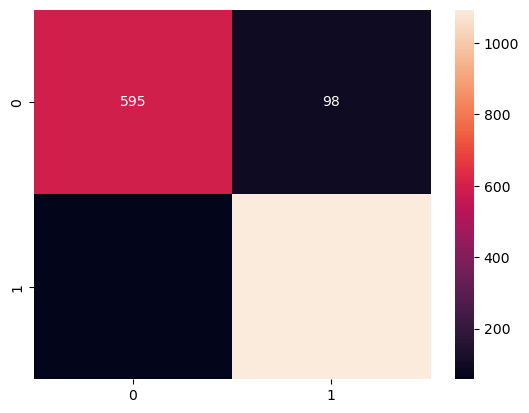

In [50]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [51]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [52]:
# Printing the performance evaluation
accuracy_xgb= accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)
kappa_xgb = cohen_kappa_score(y_test, y_pred)
specificity_xgb = specificity_score(y_test, y_pred)
log_loss_xgb = log_loss(y_test, y_pred)
roc_auc_score_xgb = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)
print("Kappa:", kappa_xgb)
print("Specificity:", specificity_xgb)
print("AUC:", roc_auc_score_xgb)
print("Log Loss:", log_loss_xgb) 

Accuracy: 0.9154013015184381
Precision: 0.9177162048698573
Recall: 0.9496090356211989
F1 Score: 0.9333902647309992
Kappa: 0.8175838921067416
Specificity: 0.8585858585858586
AUC: 0.9040974471035288
Log Loss: 3.049246165239846


### 6. Categorical Boosting (CatBoost)

In [53]:
# List of categorical feature names to be used in the model
# These features are assumed to be categorical variables in the selected features
cat_features=['V190', 'V122', 'V190A', 'V161', 'V159', 'V013', 'V121', 'V701', 'V404',
       'V124', 'V024', 'V106', 'V116', 'V025', 'V119', 'V704', 'V125', 'V201',
       'V213']

In [54]:
# Initialize the CatBoost model
model_cb=CatBoostClassifier(cat_features=cat_features)
model_cb.fit(x_train, y_train)
y_pred = model_cb.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

Learning rate set to 0.024176
0:	learn: 0.6752403	total: 239ms	remaining: 3m 58s
1:	learn: 0.6574586	total: 294ms	remaining: 2m 26s
2:	learn: 0.6377641	total: 347ms	remaining: 1m 55s
3:	learn: 0.6185341	total: 399ms	remaining: 1m 39s
4:	learn: 0.6031027	total: 444ms	remaining: 1m 28s
5:	learn: 0.5879244	total: 486ms	remaining: 1m 20s
6:	learn: 0.5737059	total: 539ms	remaining: 1m 16s
7:	learn: 0.5614788	total: 589ms	remaining: 1m 13s
8:	learn: 0.5481545	total: 644ms	remaining: 1m 10s
9:	learn: 0.5353403	total: 693ms	remaining: 1m 8s
10:	learn: 0.5256884	total: 741ms	remaining: 1m 6s
11:	learn: 0.5156205	total: 789ms	remaining: 1m 4s
12:	learn: 0.5048573	total: 839ms	remaining: 1m 3s
13:	learn: 0.4949005	total: 886ms	remaining: 1m 2s
14:	learn: 0.4859987	total: 942ms	remaining: 1m 1s
15:	learn: 0.4774696	total: 985ms	remaining: 1m
16:	learn: 0.4697693	total: 1.03s	remaining: 59.6s
17:	learn: 0.4628691	total: 1.08s	remaining: 58.9s
18:	learn: 0.4554548	total: 1.13s	remaining: 58.1s
19:	l

In [55]:
# Printing the default parameters
print(model_cb.get_params())

{'cat_features': ['V190', 'V122', 'V190A', 'V161', 'V159', 'V013', 'V121', 'V701', 'V404', 'V124', 'V024', 'V106', 'V116', 'V025', 'V119', 'V704', 'V125', 'V201', 'V213']}


<Axes: >

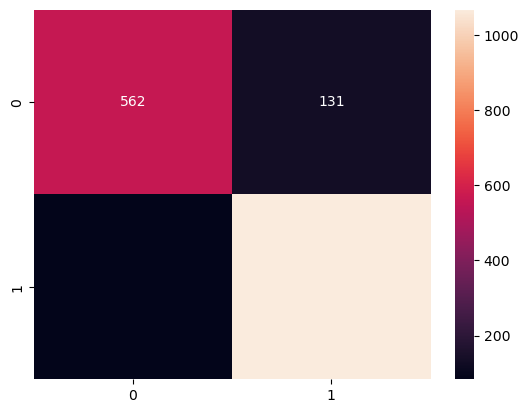

In [56]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [57]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [58]:
# Printing the performance evaluation
accuracy_cb = accuracy_score(y_test, y_pred)
precision_cb = precision_score(y_test, y_pred)
recall_cb = recall_score(y_test, y_pred)
f1_cb = f1_score(y_test, y_pred)
kappa_cb = cohen_kappa_score(y_test, y_pred)
specificity_cb = specificity_score(y_test, y_pred)
log_loss_cb = log_loss(y_test, y_pred)
roc_auc_score_cb = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_cb)
print("Precision:", precision_cb)
print("Recall:", recall_cb)
print("F1 Score:", f1_cb)
print("Kappa:", kappa_cb)
print("Specificity:", specificity_cb)
print("AUC:", roc_auc_score_cb)
print("Log Loss:", log_loss_cb) 

Accuracy: 0.8834056399132321
Precision: 0.8906510851419032
Recall: 0.9270199826238054
F1 Score: 0.9084716900808855
Kappa: 0.7480810288735258
Specificity: 0.810966810966811
AUC: 0.8689933967953083
Log Loss: 4.202486702093378


### 7. Multi-Layer Perceptron (MLP)

In [59]:
# Initialize the MLP model
model_mlp=MLPClassifier()
model_mlp.fit(x_train, y_train) 
y_pred = model_mlp.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       693
           1       0.88      0.93      0.90      1151

    accuracy                           0.87      1844
   macro avg       0.87      0.86      0.86      1844
weighted avg       0.87      0.87      0.87      1844



In [60]:
# Printing the default parameters
print(model_mlp.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


<Axes: >

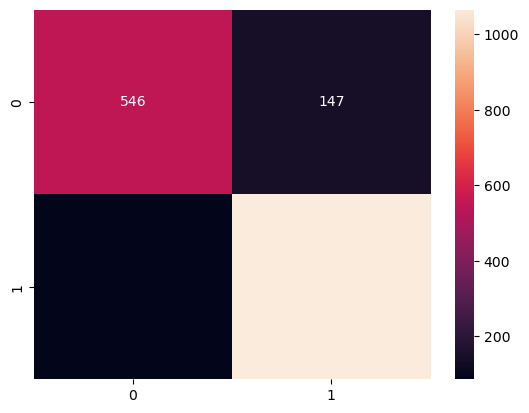

In [61]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [62]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [63]:
# Printing the performance evaluation
accuracy_mlp = accuracy_score(y_test, y_pred)
precision_mlp = precision_score(y_test, y_pred)
recall_mlp = recall_score(y_test, y_pred)
f1_mlp = f1_score(y_test, y_pred)
kappa_mlp = cohen_kappa_score(y_test, y_pred)
specificity_mlp = specificity_score(y_test, y_pred)
log_loss_mlp = log_loss(y_test, y_pred)
roc_auc_score_mlp = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_mlp)
print("Precision:", precision_mlp)
print("Recall:", recall_mlp)
print("F1 Score:", f1_mlp)
print("Kappa:", kappa_mlp)
print("Specificity:", specificity_mlp)
print("AUC:", roc_auc_score_mlp)
print("Log Loss:", log_loss_mlp) 

Accuracy: 0.8736442516268981
Precision: 0.8787128712871287
Recall: 0.9252823631624674
F1 Score: 0.9013965298349556
Kappa: 0.7258732585233145
Specificity: 0.7878787878787878
AUC: 0.8565805755206276
Log Loss: 4.55432279808259


## Hyperparameter Tuned Classification Algorithm 

### 1. Support Vector Machine (SVM)

In [64]:
# Optimize the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf','linear'],
            } 
model_svm=SVC()
# Set up the GridSearchCV to find the best combination of parameters
grid_search_svm= GridSearchCV(estimator=model_svm, param_grid=param_grid,refit = True, cv=5, n_jobs=-1, verbose=3) 
grid_search_svm.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [65]:
# Printing the  parameters
print(grid_search_svm.best_params_) 
print(grid_search_svm.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [66]:
# Print the classification report
y_pred_svm = grid_search_svm.predict(x_test) 
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       693
           1       0.93      0.98      0.96      1151

    accuracy                           0.94      1844
   macro avg       0.95      0.93      0.94      1844
weighted avg       0.94      0.94      0.94      1844



<Axes: >

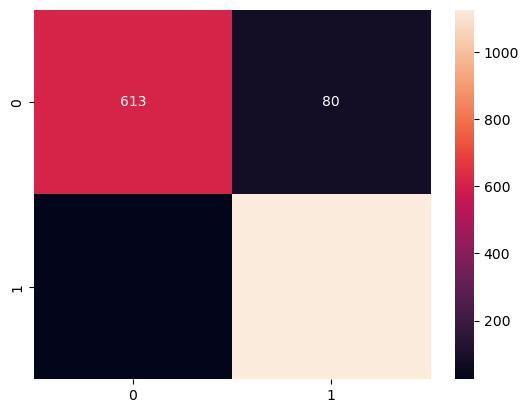

In [67]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(confusion_matrix_svm,annot=True,fmt="d")

In [68]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_svm):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_svm)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [69]:
# Printing the performance evaluation
accuracy_svm= accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
kappa_svm = cohen_kappa_score(y_test, y_pred_svm)
specificity_svm = specificity_score(y_test, y_pred_svm)
log_loss_svm = log_loss(y_test, y_pred_svm)
roc_auc_score_svm = roc_auc_score(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("Kappa:",kappa_svm)
print("Specificity:", specificity_svm)
print("AUC:", roc_auc_score_svm)
print("Log Loss:", log_loss_svm) 

Accuracy: 0.943058568329718
Precision: 0.9336650082918739
Recall: 0.9782797567332754
F1 Score: 0.955451845566398
Kappa: 0.8766826996565815
Specificity: 0.8845598845598845
AUC: 0.9314198206465799
Log Loss: 2.0523772266037428


In [70]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_svm = roc_auc_score(y_test, y_pred_svm)

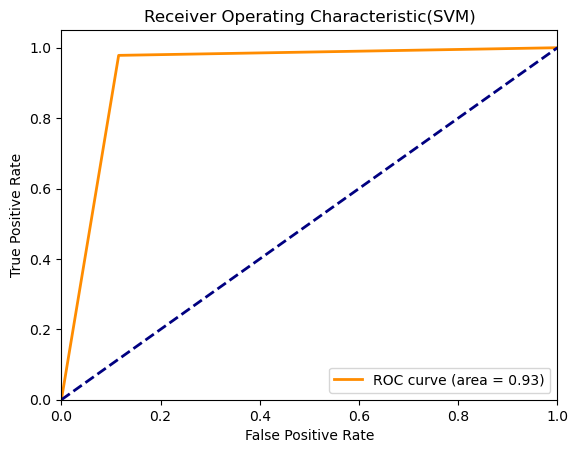

In [71]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {auc_svm:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(SVM)')
plt.legend(loc="lower right")
plt.show()

#### Feature Importance

In [73]:
# Compute permutation importance
perm_importance= permutation_importance(grid_search_svm, x_test, y_test, n_repeats=30, random_state=42)
importance_df = pd.DataFrame(perm_importance.importances_mean, index=x_resampled.columns, columns=["Importance"])
importance_df = importance_df.sort_values(by="Importance", ascending=False)
# Display the results
print(importance_df)

       Importance
V190     0.148409
V013     0.138485
V024     0.125813
V190A    0.123373
V159     0.066305
V201     0.065076
V701     0.058207
V704     0.048988
V106     0.046909
V116     0.018637
V025     0.014660
V404     0.013811
V122     0.008406
V121     0.006562
V119     0.005441
V161     0.004501
V124     0.000398
V125     0.000181
V213     0.000127


### 2. Logistic Regression (LR)

In [74]:
# Optimize the parameter grid for hyperparameter tuning
param_grid={
"penalty" : ["l1","elasticnet"],
"solver" : ["lbfgs","liblinear","sag","saga"],
"max_iter" : [100,300,500,1000],
'C':np.linspace(0,1,30)
}
model_lr = LogisticRegression(random_state= 42)
# Set up the GridSearchCV to find the best combination of parameters
grid_search_lr = GridSearchCV(estimator= model_lr, param_grid= param_grid, cv=5, scoring= 'accuracy', n_jobs=-1, verbose=1)
grid_search_lr.fit(x_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]),
                         'max_iter': [100, 300, 500, 1000],
                         'penalty': ['l1', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy', verbose=1)

In [75]:
# Printing the best parameters and estimators
print(grid_search_lr.best_params_) 
print(grid_search_lr.best_estimator_)

{'C': 0.1724137931034483, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=0.1724137931034483, penalty='l1', random_state=42,
                   solver='liblinear')


In [76]:
# Print the classification report
y_pred_lr = grid_search_lr.predict(x_test) 
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       693
           1       0.85      0.90      0.88      1151

    accuracy                           0.84      1844
   macro avg       0.83      0.82      0.83      1844
weighted avg       0.84      0.84      0.84      1844



<Axes: >

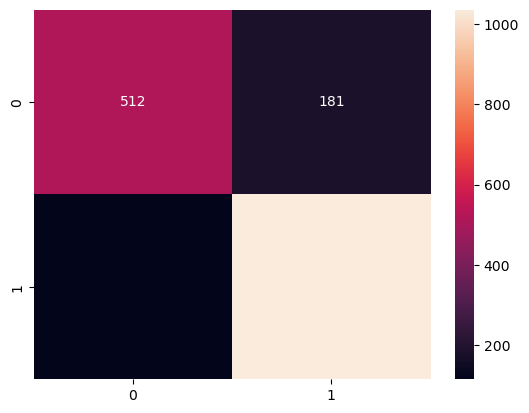

In [77]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(confusion_matrix_lr,annot=True,fmt="d")

In [78]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_lr):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_lr)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [79]:
# Printing the performance evaluation
accuracy_lr= accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
kappa_lr = cohen_kappa_score(y_test, y_pred_lr)
specificity_lr = specificity_score(y_test, y_pred_lr)
log_loss_lr = log_loss(y_test, y_pred_lr)
roc_auc_score_lr = roc_auc_score(y_test, y_pred_lr)

print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("Kappa:", kappa_lr)
print("Specificity:", specificity_lr)
print("AUC:", roc_auc_score_lr)
print("Log Loss:", log_loss_lr) 

Accuracy: 0.8394793926247288
Precision: 0.8512736236647493
Recall: 0.9000868809730669
F1 Score: 0.875
Kappa: 0.651243596083979
Specificity: 0.7388167388167388
AUC: 0.8194518098949028
Log Loss: 5.785749134044836


In [80]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_lr = roc_auc_score(y_test, y_pred_lr)

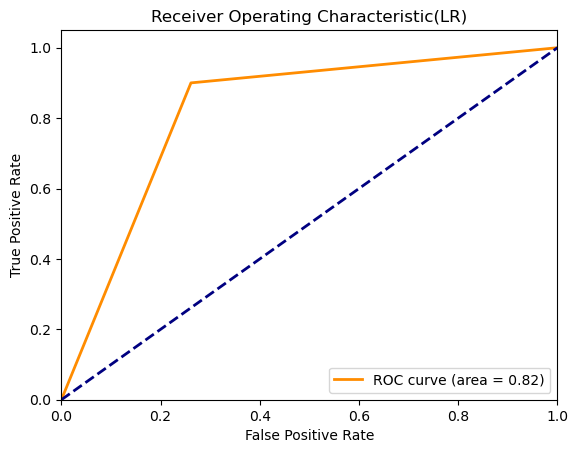

In [81]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_lr:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(LR)')
plt.legend(loc="lower right")
plt.show()

### 3. Random Forest (RF)

In [82]:
# Optimize the parameter grid for hyperparameter tuning
param_grid = { 
	'n_estimators': [25, 50, 100, 150], 
	'max_features': ['sqrt', 'log2'], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],  
    'criterion': ['gini', 'entropy']  
}
model_rf = RandomForestClassifier(random_state=42)
# Set up the GridSearchCV to find the best combination of parameters
grid_search_rf = GridSearchCV(estimator= model_rf, param_grid= param_grid, refit=True, cv=5, verbose=True, n_jobs=-1,scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='accuracy', verbose=True)

In [83]:
# Printing the best parameters and estimators
print(grid_search_rf.best_params_) 
print(grid_search_rf.best_estimator_)

{'bootstrap': False, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(bootstrap=False, criterion='entropy', random_state=42)


In [84]:
# Print the classification report
y_pred_rf = grid_search_rf.predict(x_test) 
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       693
           1       0.94      0.96      0.95      1151

    accuracy                           0.94      1844
   macro avg       0.94      0.93      0.93      1844
weighted avg       0.94      0.94      0.94      1844



<Axes: >

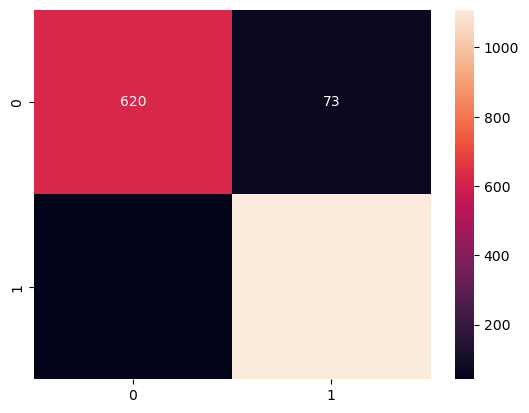

In [85]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(confusion_matrix_rf,annot=True,fmt="d")

In [86]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_rf):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_rf)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [87]:
# Printing the performance evaluation
accuracy_rf= accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)
specificity_rf = specificity_score(y_test, y_pred_rf)
log_loss_rf = log_loss(y_test, y_pred_rf)
roc_auc_score_rf = roc_auc_score(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Kappa:", kappa_rf)
print("Specificity:", specificity_rf)
print("AUC:", roc_auc_score_rf)
print("Log Loss:", log_loss_rf) 

Accuracy: 0.9376355748373102
Precision: 0.9382402707275804
Recall: 0.9635099913119027
F1 Score: 0.9507072438919846
Kappa: 0.8658771681272642
Specificity: 0.8946608946608947
AUC: 0.9290854429863987
Log Loss: 2.2478417243755273


In [88]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_rf = roc_auc_score(y_test, y_pred_rf)

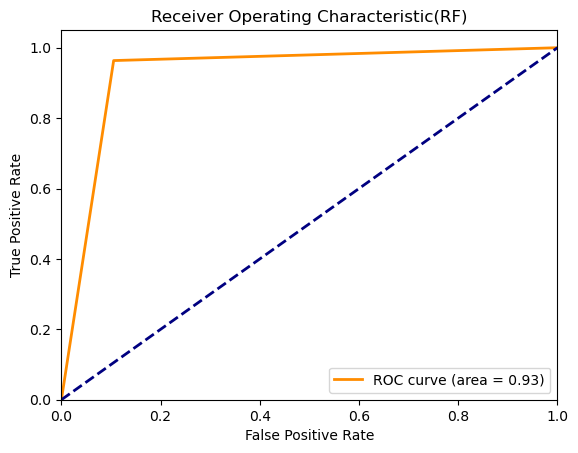

In [89]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {auc_rf:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(RF)')
plt.legend(loc="lower right")
plt.show()

### 4. K-Nearest Neighbor (KNN)

In [90]:
# Optimize the parameter grid for hyperparameter tuning
param_grid = {
    "n_neighbors" : [3,4,5,8,10],
    'metric': ['euclidean', 'manhattan'],
    "weights" : ["uniform","distance"],
    "algorithm" : ["auto","ball_tree","kd_tree","brute"],
    "leaf_size" : [10,20,30,40,50],
}
model_knn = KNeighborsClassifier()
# Set up the GridSearchCV to find the best combination of parameters
grid_search_knn= GridSearchCV(estimator= model_knn, param_grid= param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(x_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 8, 10],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [91]:
# Printing the best parameters and estimators
print(grid_search_knn.best_params_) 
print(grid_search_knn.best_estimator_)

{'algorithm': 'kd_tree', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
KNeighborsClassifier(algorithm='kd_tree', leaf_size=20, metric='manhattan',
                     n_neighbors=4, weights='distance')


In [92]:
# Print the classification report
y_pred_knn = grid_search_knn.predict(x_test) 
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       693
           1       0.93      0.97      0.95      1151

    accuracy                           0.94      1844
   macro avg       0.94      0.93      0.93      1844
weighted avg       0.94      0.94      0.94      1844



<Axes: >

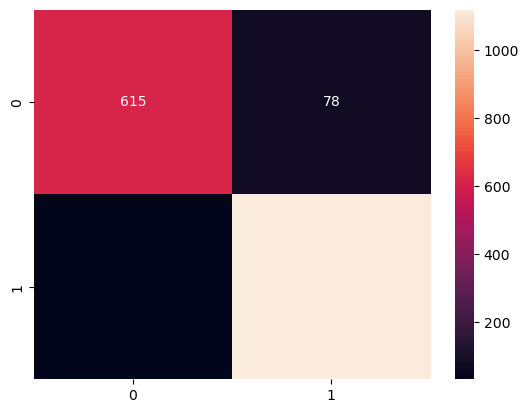

In [93]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(confusion_matrix_knn,annot=True,fmt="d")

In [94]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_knn):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_knn)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [95]:
# Printing the performance evaluation
accuracy_knn= accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
kappa_knn = cohen_kappa_score(y_test, y_pred_knn)
specificity_knn = specificity_score(y_test, y_pred_knn)
log_loss_knn = log_loss(y_test, y_pred_knn)
roc_auc_score_knn = roc_auc_score(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("Kappa:", kappa_knn)
print("Specificity:", specificity_knn)
print("AUC:", roc_auc_score_knn)
print("Log Loss:", log_loss_knn) 

Accuracy: 0.9398047722342733
Precision: 0.9347826086956522
Recall: 0.9713292788879235
F1 Score: 0.9527055815935237
Kappa: 0.8700151650244241
Specificity: 0.8874458874458875
AUC: 0.9293875831669056
Log Loss: 2.1696559252668135


In [96]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_knn = roc_auc_score(y_test, y_pred_knn)

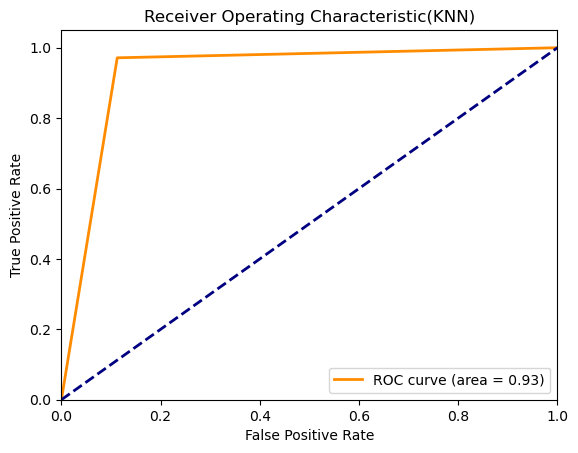

In [97]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {auc_knn:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(KNN)')
plt.legend(loc="lower right")
plt.show()

### 5. Extreme Gradient Boosting (XGBoost)

In [98]:
# Optimize the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}
model_xgb = xgb.XGBClassifier(enable_categorical=True, random_state=42)
# Set up the GridSearchCV to find the best combination of parameters
grid_search_xgb = GridSearchCV(estimator= model_xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             verbose=2)

In [99]:
# Printing the best parameters and estimators
print(grid_search_xgb.best_params_) 
print(grid_search_xgb.best_estimator_)

{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.9}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [100]:
# Print the classification report
y_pred_xgb = grid_search_xgb.predict(x_test) 
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       693
           1       0.92      0.95      0.94      1151

    accuracy                           0.92      1844
   macro avg       0.92      0.91      0.91      1844
weighted avg       0.92      0.92      0.92      1844



<Axes: >

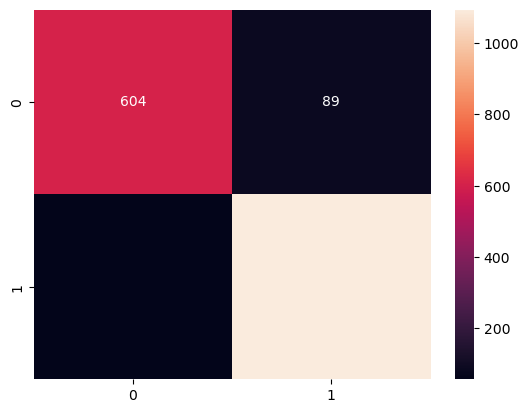

In [101]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(confusion_matrix_xgb,annot=True,fmt="d")

In [102]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_xgb):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_xgb)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [103]:
# Printing the performance evaluation
accuracy_xgb= accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
kappa_xgb = cohen_kappa_score(y_test, y_pred_xgb)
specificity_xgb = specificity_score(y_test, y_pred_xgb)
log_loss_xgb = log_loss(y_test, y_pred_xgb)
roc_auc_score_xgb = roc_auc_score(y_test, y_pred_xgb)

print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)
print("Kappa:", kappa_xgb)
print("Specificity:", specificity_xgb)
print("AUC:", roc_auc_score_xgb)
print("Log Loss:", log_loss_xgb) 

Accuracy: 0.920824295010846
Precision: 0.9247675401521556
Recall: 0.950477845351868
F1 Score: 0.9374464438731791
Kappa: 0.8296729784959161
Specificity: 0.8715728715728716
AUC: 0.9110253584623698
Log Loss: 2.8537816674680605


In [104]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_xgb = roc_auc_score(y_test, y_pred_xgb)

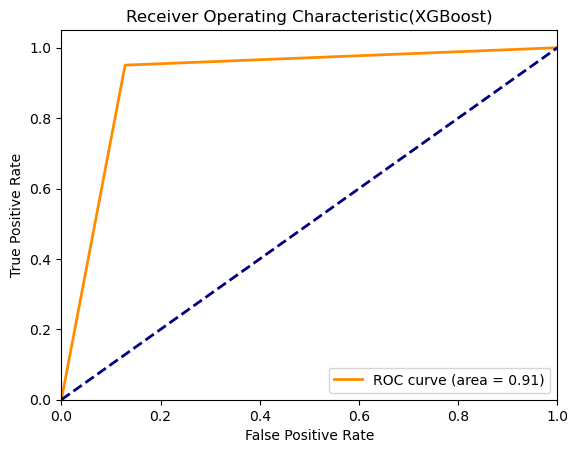

In [105]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {auc_xgb:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(XGBoost)')
plt.legend(loc="lower right")
plt.show()

### 6. Categorical Boosting (CatBoost)

In [106]:
cat_features = ['V190', 'V122', 'V190A', 'V161', 'V159', 'V013', 'V121', 'V701', 'V404','V124', 'V024', 'V106', 'V116', 'V025', 'V119', 
               'V704', 'V125', 'V201', 'V213']
model_cb = CatBoostClassifier(random_state=42, verbose=False,cat_features = cat_features )
# Optimize the parameter grid for hyperparameter tuning
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}
# Set up the GridSearchCV to find the best combination of parameters
grid_search_cb = GridSearchCV(estimator= model_cb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_cb.fit(x_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000254EBA27810>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5, 7, 9],
                         'learning_rate': [0.01, 0.05, 0.1]},
             verbose=2)

In [107]:
# Printing the best parameters and estimators
print(grid_search_cb.best_params_) 
print(grid_search_cb.best_estimator_)

{'depth': 8, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


In [108]:
# Print the classification report
y_pred_cb = grid_search_cb.predict(x_test) 
print(classification_report(y_test, y_pred_cb))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       693
           1       0.90      0.94      0.92      1151

    accuracy                           0.90      1844
   macro avg       0.90      0.88      0.89      1844
weighted avg       0.90      0.90      0.90      1844



<Axes: >

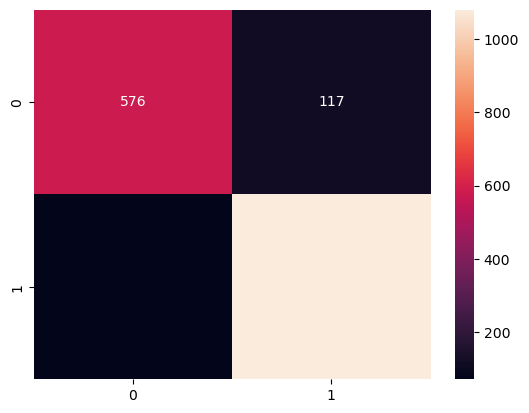

In [109]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_cb = confusion_matrix(y_test, y_pred_cb)
sns.heatmap(confusion_matrix_cb,annot=True,fmt="d")

In [110]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_cb):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_cb)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [111]:
# Printing the performance evaluation
accuracy_cb = accuracy_score(y_test, y_pred_cb)
precision_cb = precision_score(y_test, y_pred_cb)
recall_cb = recall_score(y_test, y_pred_cb)
f1_cb = f1_score(y_test, y_pred_cb)
kappa_cb = cohen_kappa_score(y_test, y_pred_cb)
specificity_cb = specificity_score(y_test, y_pred_cb)
log_loss_cb = log_loss(y_test, y_pred_cb)
roc_auc_score_cb = roc_auc_score(y_test, y_pred_cb)

print("Accuracy:", accuracy_cb)
print("Precision:", precision_cb)
print("Recall:", recall_cb)
print("F1 Score:", f1_cb)
print("Kappa:", kappa_cb)
print("Specificity:", specificity_cb)
print("AUC:", roc_auc_score_cb)
print("Log Loss:", log_loss_cb) 

Accuracy: 0.8980477223427332
Precision: 0.9022556390977443
Recall: 0.9383145091225021
F1 Score: 0.919931856899489
Kappa: 0.7797814533946379
Specificity: 0.8311688311688312
AUC: 0.8847416701456667
Log Loss: 3.674732558109558


In [112]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_pred_cb)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_cb = roc_auc_score(y_test, y_pred_cb)

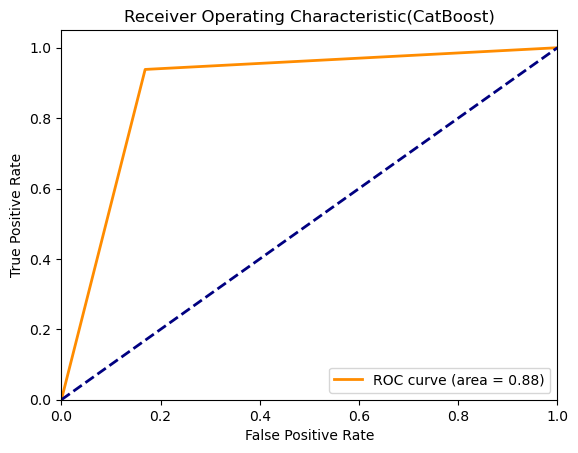

In [113]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_cb, tpr_cb, color='darkorange', lw=2, label=f'ROC curve (area = {auc_cb:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(CatBoost)')
plt.legend(loc="lower right")
plt.show()

### 7. Multi-Layer Perceptron (MLP)

In [114]:
# Optimize the parameter grid for hyperparameter tuning
param_grid= {
   'hidden_layer_sizes': [(50,), (50,50), (100,),(100,50)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001,0.001,.01, 0.05],
    'learning_rate': ['constant','adaptive','invscaling'],
}
model_mlp=MLPClassifier(random_state=42)
# Set up the GridSearchCV to find the best combination of parameters
grid_search_mlp= GridSearchCV( estimator= model_mlp, param_grid=param_grid, cv = 5, n_jobs=-1, verbose=2)
grid_search_mlp.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01, 0.05],
                         'hidden_layer_sizes': [(50,), (50, 50), (100,),
                                                (100, 50)],
                         'learning_rate': ['constant', 'adaptive',
                                           'invscaling'],
                         'solver': ['sgd', 'adam']},
             verbose=2)

In [115]:
# Printing the best parameters and estimators
print(grid_search_mlp.best_params_) 
print(grid_search_mlp.best_estimator_)

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 50), random_state=42)


In [116]:
# Print the classification report
y_pred_mlp = grid_search_mlp.predict(x_test) 
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       693
           1       0.90      0.93      0.92      1151

    accuracy                           0.89      1844
   macro avg       0.89      0.88      0.88      1844
weighted avg       0.89      0.89      0.89      1844



<Axes: >

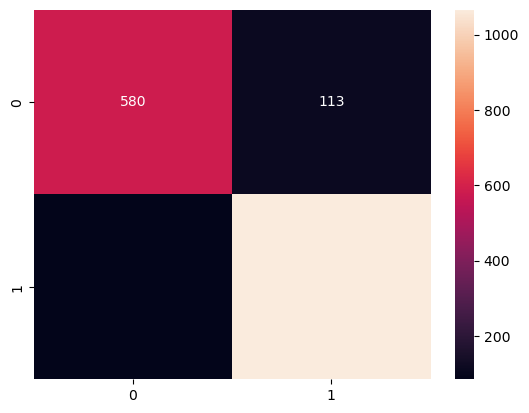

In [117]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(confusion_matrix_mlp,annot=True,fmt="d")

In [118]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_mlp):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_mlp)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [119]:
# Printing the performance evaluation
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
kappa_mlp = cohen_kappa_score(y_test, y_pred_mlp)
specificity_mlp = specificity_score(y_test, y_pred_mlp)
log_loss_mlp = log_loss(y_test, y_pred_mlp)
roc_auc_score_mlp = roc_auc_score(y_test, y_pred_mlp)

print("Accuracy:", accuracy_mlp)
print("Precision:", precision_mlp)
print("Recall:", recall_mlp)
print("F1 Score:", f1_mlp)
print("Kappa:", kappa_mlp)
print("Specificity:", specificity_mlp)
print("AUC:", roc_auc_score_mlp)
print("Log Loss:", log_loss_mlp) 

Accuracy: 0.8926247288503254
Precision: 0.904156064461408
Recall: 0.9261511728931364
F1 Score: 0.9150214592274678
Kappa: 0.7692759762951653
Specificity: 0.836940836940837
AUC: 0.8815460049169865
Log Loss: 3.870197055881343


In [120]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_mlp = roc_auc_score(y_test, y_pred_mlp)

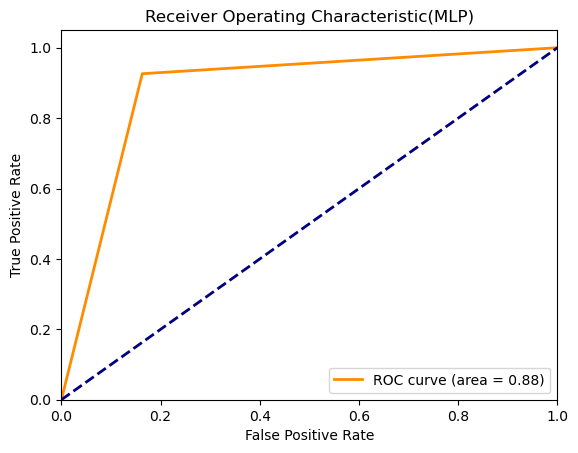

In [121]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'ROC curve (area = {auc_mlp:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(MLP)')
plt.legend(loc="lower right")
plt.show()

## Combined ROC Curve

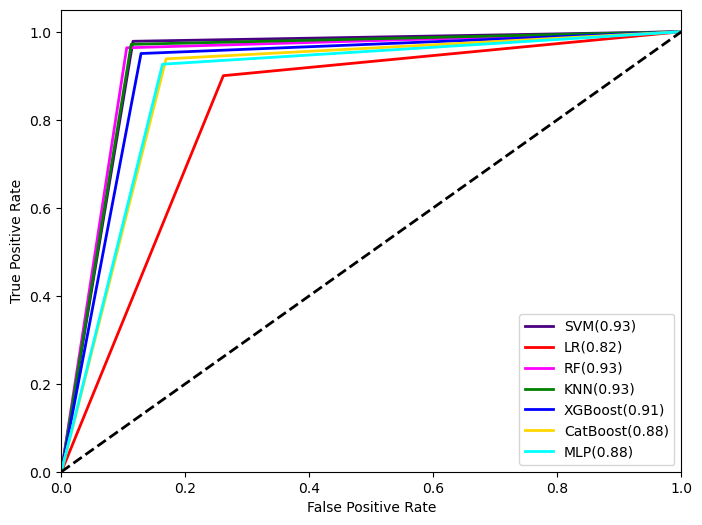

In [123]:
# Plotting ROC curves for multiple algorithms
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='indigo', lw=2, label=f'SVM({auc_svm:0.2f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'LR({auc_lr:0.2f})')
plt.plot(fpr_rf, tpr_rf, color='magenta', lw=2, label=f'RF({auc_rf:0.2f})')
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN({auc_knn:0.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost({auc_xgb:0.2f})')
plt.plot(fpr_cb, tpr_cb, color='gold', lw=2, label=f'CatBoost({auc_cb:0.2f})')
plt.plot(fpr_mlp, tpr_mlp, color='cyan', lw=2, label=f'MLP({auc_mlp:0.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()